In [2]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install wordcloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
import string
import re
from textblob import TextBlob
from wordcloud import WordCloud
!pip install contractions

import contractions

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('C:/Users/Utkarsh/Documents/Reviewify/New folder/rawdata.csv')

In [4]:
df.head()

,Column 1,Course,Curriculum,Faculty,Infrastructure,College Crowd & Life,Facilities,good value for money,refer,review,sentiment
0,NaN,B.Tech,1,4,3,2,4,4,Yes,Dikhaava hai sab. Apni padhai karo aur niklo,Negative
1,NaN,B.Tech,2,1,1,1,1,1,No,Only friends are the bestest in this college.....,Negative
2,NaN,B.Tech,4,4,3,2,3,4,No,It's okay.,Positive
3,NaN,B.Tech,1,1,2,1,1,1,No,Very bad experience... This is not a college t...,Negative
4,NaN,B.Tech,3,2,3,3,3,2,Yes,"Faculties promised are not delivered,overall e...",Negative


In [5]:
df= df.drop('Column 1', axis=1)
df.head()

,Course,Curriculum,Faculty,Infrastructure,College Crowd & Life,Facilities,good value for money,refer,review,sentiment
0,B.Tech,1,4,3,2,4,4,Yes,Dikhaava hai sab. Apni padhai karo aur niklo,Negative
1,B.Tech,2,1,1,1,1,1,No,Only friends are the bestest in this college.....,Negative
2,B.Tech,4,4,3,2,3,4,No,It's okay.,Positive
3,B.Tech,1,1,2,1,1,1,No,Very bad experience... This is not a college t...,Negative
4,B.Tech,3,2,3,3,3,2,Yes,"Faculties promised are not delivered,overall e...",Negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Course                81 non-null     object
 1   Curriculum            81 non-null     int64 
 2   Faculty               81 non-null     int64 
 3   Infrastructure        81 non-null     int64 
 4   College Crowd & Life  81 non-null     int64 
 5   Facilities            81 non-null     int64 
 6   good value for money  81 non-null     int64 
 7   refer                 81 non-null     object
 8   review                81 non-null     object
 9   sentiment             81 non-null     object
dtypes: int64(6), object(4)
memory usage: 6.5+ KB


In [7]:
df['review']

0          Dikhaava hai sab. Apni padhai karo aur niklo
1     Only friends are the bestest in this college.....
2                                            It's okay.
3     Very bad experience... This is not a college t...
4     Faculties promised are not delivered,overall e...
                            ...                        
76                             vey bad no wifi range \n
77                                              Average
78                                              Average
79                            Good learning experience 
80                                                 Good
Name: review, Length: 81, dtype: object

In [8]:
df.isnull().sum()

Course                  0
Curriculum              0
Faculty                 0
Infrastructure          0
College Crowd & Life    0
Facilities              0
good value for money    0
refer                   0
review                  0
sentiment               0
dtype: int64

In [9]:
df= df.dropna()
df.isnull().sum()

Course                  0
Curriculum              0
Faculty                 0
Infrastructure          0
College Crowd & Life    0
Facilities              0
good value for money    0
refer                   0
review                  0
sentiment               0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Course                80 non-null     object
 1   Curriculum            80 non-null     int64 
 2   Faculty               80 non-null     int64 
 3   Infrastructure        80 non-null     int64 
 4   College Crowd & Life  80 non-null     int64 
 5   Facilities            80 non-null     int64 
 6   good value for money  80 non-null     int64 
 7   refer                 80 non-null     object
 8   review                80 non-null     object
 9   sentiment             80 non-null     object
dtypes: int64(6), object(4)
memory usage: 6.9+ KB


In [13]:
df['sentiment'].value_counts()

sentiment
Positive    41
Negative    39
Name: count, dtype: int64

In [14]:
df['Course'].value_counts()

Course
B.Tech      69
BCA          6
BBA          3
B.Pharma     1
MBA          1
Name: count, dtype: int64

In [15]:
#NLP

In [16]:
#lowercase
df['review']= df['review'].str.lower()
df['review'].head()

0         dikhaava hai sab. apni padhai karo aur niklo
1    only friends are the bestest in this college.....
2                                           it's okay.
3    very bad experience... this is not a college t...
4    faculties promised are not delivered,overall e...
Name: review, dtype: object

In [17]:
#expanding abrrivieations
def remove_abb(data):
     data = re.sub(r"he's", "he is", data)
     data = re.sub(r"there's", "there is", data)
     data = re.sub(r"We're", "We are", data)
     data = re.sub(r"That's", "That is", data)
     data = re.sub(r"won't", "will not", data)
     data = re.sub(r"they're", "they are", data)
     data = re.sub(r"Can't", "Cannot", data)
     data = re.sub(r"wasn't", "was not", data)
     data = re.sub(r"don\x89Ûªt", "do not", data)
     data= re.sub(r"aren't", "are not", data)
     data = re.sub(r"isn't", "is not", data)
     data = re.sub(r"What's", "What is", data)
     data = re.sub(r"haven't", "have not", data)
     data = re.sub(r"hasn't", "has not", data)
     data = re.sub(r"There's", "There is", data)
     data = re.sub(r"He's", "He is", data)
     data = re.sub(r"It's", "It is", data)
     data = re.sub(r"You're", "You are", data)
     data = re.sub(r"I'M", "I am", data)
     data = re.sub(r"shouldn't", "should not", data)
     data = re.sub(r"wouldn't", "would not", data)
     data = re.sub(r"i'm", "I am", data)
     data = re.sub(r"I\x89Ûªm", "I am", data)
     data = re.sub(r"I'm", "I am", data)
     data = re.sub(r"Isn't", "is not", data)
     data = re.sub(r"Here's", "Here is", data)
     data = re.sub(r"you've", "you have", data)
     data = re.sub(r"you\x89Ûªve", "you have", data)
     data = re.sub(r"we're", "we are", data)
     data = re.sub(r"what's", "what is", data)
     data = re.sub(r"couldn't", "could not", data)
     data = re.sub(r"we've", "we have", data)
     data = re.sub(r"it\x89Ûªs", "it is", data)
     data = re.sub(r"doesn\x89Ûªt", "does not", data)
     data = re.sub(r"It\x89Ûªs", "It is", data)
     data = re.sub(r"Here\x89Ûªs", "Here is", data)
     data = re.sub(r"who's", "who is", data)
     data = re.sub(r"I\x89Ûªve", "I have", data)
     data = re.sub(r"y'all", "you all", data)
     data = re.sub(r"can\x89Ûªt", "cannot", data)
     data = re.sub(r"would've", "would have", data)
     data = re.sub(r"it'll", "it will", data)
     data = re.sub(r"we'll", "we will", data)
     data = re.sub(r"wouldn\x89Ûªt", "would not", data)
     data = re.sub(r"We've", "We have", data)
     data = re.sub(r"he'll", "he will", data)
     data = re.sub(r"Y'all", "You all", data)
     data = re.sub(r"Weren't", "Were not", data)
     data = re.sub(r"Didn't", "Did not", data)
     data = re.sub(r"they'll", "they will", data)
     data = re.sub(r"they'd", "they would", data)
     data = re.sub(r"DON'T", "DO NOT", data)
     data = re.sub(r"That\x89Ûªs", "That is", data)
     data = re.sub(r"they've", "they have", data)
     data = re.sub(r"i'd", "I would", data)
     data = re.sub(r"should've", "should have", data)
     data = re.sub(r"You\x89Ûªre", "You are", data)
     data = re.sub(r"where's", "where is", data)
     data = re.sub(r"Don\x89Ûªt", "Do not", data)
     data = re.sub(r"we'd", "we would", data)
     data = re.sub(r"i'll", "I will", data)
     data = re.sub(r"weren't", "were not", data)
     data = re.sub(r"They're", "They are", data)
     data = re.sub(r"Can\x89Ûªt", "Cannot", data)
     data = re.sub(r"you\x89Ûªll", "you will", data)
     data = re.sub(r"I\x89Ûªd", "I would", data)
     data = re.sub(r"let's", "let us", data)
     data = re.sub(r"it's", "it is", data)
     data = re.sub(r"can't", "cannot", data)
     data = re.sub(r"don't", "do not", data)
     data = re.sub(r"you're", "you are", data)
     data = re.sub(r"i've", "I have", data)
     data = re.sub(r"that's", "that is", data)
     data = re.sub(r"i'll", "I will", data)
     data = re.sub(r"doesn't", "does not",data)
     data = re.sub(r"i'd", "I would", data)
     data = re.sub(r"didn't", "did not", data)
     data = re.sub(r"ain't", "am not", data)
     data = re.sub(r"you'll", "you will", data)
     data = re.sub(r"I've", "I have", data)
     data = re.sub(r"Don't", "do not", data)
     data = re.sub(r"I'll", "I will", data)
     data = re.sub(r"I'd", "I would", data)
     data = re.sub(r"Let's", "Let us", data)
     data = re.sub(r"you'd", "You would", data)
     data = re.sub(r"It's", "It is", data)
     data = re.sub(r"Ain't", "am not", data)
     data = re.sub(r"Haven't", "Have not", data)
     data = re.sub(r"Could've", "Could have", data)
     data = re.sub(r"youve", "you have", data)
     data = re.sub(r"donå«t", "do not", data)
     return data

df['review']= df['review'].apply(remove_abb)
df['review']


0          dikhaava hai sab. apni padhai karo aur niklo
1     only friends are the bestest in this college.....
2                                           it is okay.
3     very bad experience... this is not a college t...
4     faculties promised are not delivered,overall e...
                            ...                        
76                             vey bad no wifi range \n
77                                              average
78                                              average
79                            good learning experience 
80                                                 good
Name: review, Length: 80, dtype: object

In [18]:
#spelling mistakes correct

def spell_correct(text):
    return TextBlob(str(text)).correct().string

df['review'].apply(spell_correct)
df['review'].head()

0         dikhaava hai sab. apni padhai karo aur niklo
1    only friends are the bestest in this college.....
2                                          it is okay.
3    very bad experience... this is not a college t...
4    faculties promised are not delivered,overall e...
Name: review, dtype: object

In [19]:
#removing punctuation

def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
    return text 

df['review'] = df['review'].apply(remove_punctuation)

df['review'].head()

0          dikhaava hai sab apni padhai karo aur niklo
1    only friends are the bestest in this college a...
2                                           it is okay
3    very bad experience this is not a college this...
4    faculties promised are not deliveredoverall ex...
Name: review, dtype: object

In [20]:
#tokenization
df['tokenized_review'] = df['review'].apply(word_tokenize)
df['tokenized_review'].head()

0    [dikhaava, hai, sab, apni, padhai, karo, aur, ...
1    [only, friends, are, the, bestest, in, this, c...
2                                       [it, is, okay]
3    [very, bad, experience, this, is, not, a, coll...
4    [faculties, promised, are, not, deliveredovera...
Name: tokenized_review, dtype: object

In [21]:
#stop words removal
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in text if word.lower() not in stop_words]
    return filtered_words

df['tokenized_review']=df['tokenized_review'].apply(remove_stopwords)

df['tokenized_review'].head()

0    [dikhaava, hai, sab, apni, padhai, karo, aur, ...
1      [friends, bestest, college, basic, things, bad]
2                                               [okay]
3              [bad, experience, college, small, jail]
4    [faculties, promised, deliveredoverall, experi...
Name: tokenized_review, dtype: object

In [22]:
#stemming

stemmer = PorterStemmer()
df['review'] = df['tokenized_review'].apply(lambda words: [stemmer.stem(word) for word in words])
df['review'].head()

0    [dikhaava, hai, sab, apni, padhai, karo, aur, ...
1         [friend, bestest, colleg, basic, thing, bad]
2                                               [okay]
3                   [bad, experi, colleg, small, jail]
4    [faculti, promis, deliveredoveral, experi, hor...
Name: review, dtype: object

In [23]:
#lemmatization

lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda words: [lemmatizer.lemmatize(word, pos='v') for word in words])
df['review'].head()

0    [dikhaava, hai, sab, apni, padhai, karo, aur, ...
1         [friend, bestest, colleg, basic, thing, bad]
2                                               [okay]
3                   [bad, experi, colleg, small, jail]
4    [faculti, promis, deliveredoveral, experi, hor...
Name: review, dtype: object

In [31]:
#remove extra white spaces
#df['review'] = df['review'].apply(lambda x: ' '.join(x[0].split()) if isinstance(x, list) and len(x) > 0 else x)

df['review'].head()

0    [dikhaava, hai, sab, apni, padhai, karo, aur, ...
1         [friend, bestest, colleg, basic, thing, bad]
2                                               [okay]
3                   [bad, experi, colleg, small, jail]
4    [faculti, promis, deliveredoveral, experi, hor...
Name: review, dtype: object

In [32]:
#handling abbrivieations


df['review'] = df['review'].apply(lambda x: contractions.fix(x) if isinstance(x, str) else x)
df['review'].head()

0    [dikhaava, hai, sab, apni, padhai, karo, aur, ...
1         [friend, bestest, colleg, basic, thing, bad]
2                                               [okay]
3                   [bad, experi, colleg, small, jail]
4    [faculti, promis, deliveredoveral, experi, hor...
Name: review, dtype: object

In [33]:
#review<--tokenized review
df['review'] = df['tokenized_review'].apply(lambda x:" ".join(x))
df['review'].head()

0          dikhaava hai sab apni padhai karo aur niklo
1             friends bestest college basic things bad
2                                                 okay
3                    bad experience college small jail
4    faculties promised deliveredoverall experience...
Name: review, dtype: object

In [34]:
df['char_length'] = df['review'].str.len()
df.head()

,Course,Curriculum,Faculty,Infrastructure,College Crowd & Life,Facilities,good value for money,refer,review,sentiment,tokenized_review,char_length
0,B.Tech,1,4,3,2,4,4,Yes,dikhaava hai sab apni padhai karo aur niklo,Negative,"[dikhaava, hai, sab, apni, padhai, karo, aur, ...",43
1,B.Tech,2,1,1,1,1,1,No,friends bestest college basic things bad,Negative,"[friends, bestest, college, basic, things, bad]",40
2,B.Tech,4,4,3,2,3,4,No,okay,Positive,[okay],4
3,B.Tech,1,1,2,1,1,1,No,bad experience college small jail,Negative,"[bad, experience, college, small, jail]",33
4,B.Tech,3,2,3,3,3,2,Yes,faculties promised deliveredoverall experience...,Negative,"[faculties, promised, deliveredoverall, experi...",65


In [35]:
#Data Analysis

In [36]:
df['tokenized_review'].sum()

['dikhaava',
 'hai',
 'sab',
 'apni',
 'padhai',
 'karo',
 'aur',
 'niklo',
 'friends',
 'bestest',
 'college',
 'basic',
 'things',
 'bad',
 'okay',
 'bad',
 'experience',
 'college',
 'small',
 'jail',
 'faculties',
 'promised',
 'deliveredoverall',
 'experience',
 'horrible',
 'companies',
 'great',
 'experience',
 'studying',
 'college',
 'good',
 'opportunities',
 'pathetic',
 'good',
 'really',
 'nothing',
 'worst',
 'experience',
 'teachers',
 'manners',
 'speak',
 'college',
 'great',
 'infrastructure',
 'facilities',
 'faculty',
 'much',
 'experienced',
 'knowledgeable',
 'facilities',
 'available',
 'per',
 'amount',
 'pay',
 'good',
 'could',
 'better',
 'bad',
 'okayish',
 'infrastructure',
 'good',
 'summers',
 'even',
 'winters',
 'students',
 'even',
 'place',
 'sit',
 'recess',
 'free',
 'lectures',
 'roam',
 'get',
 'place',
 'sit',
 'comfortably',
 'whenever',
 'free',
 'also',
 'many',
 'unnecessary',
 'rules',
 'like',
 'u',
 'even',
 'cut',
 'cake',
 'ur',
 'friend

In [37]:
pd.Series(ngrams(df['review'].sum(),2)).value_counts()

(e,  )    91
(s,  )    73
(e, r)    63
(e, n)    61
(i, n)    56
          ..
(t, w)     1
(9, 5)     1
( , 9)     1
(j, a)     1
(y, v)     1
Name: count, Length: 366, dtype: int64

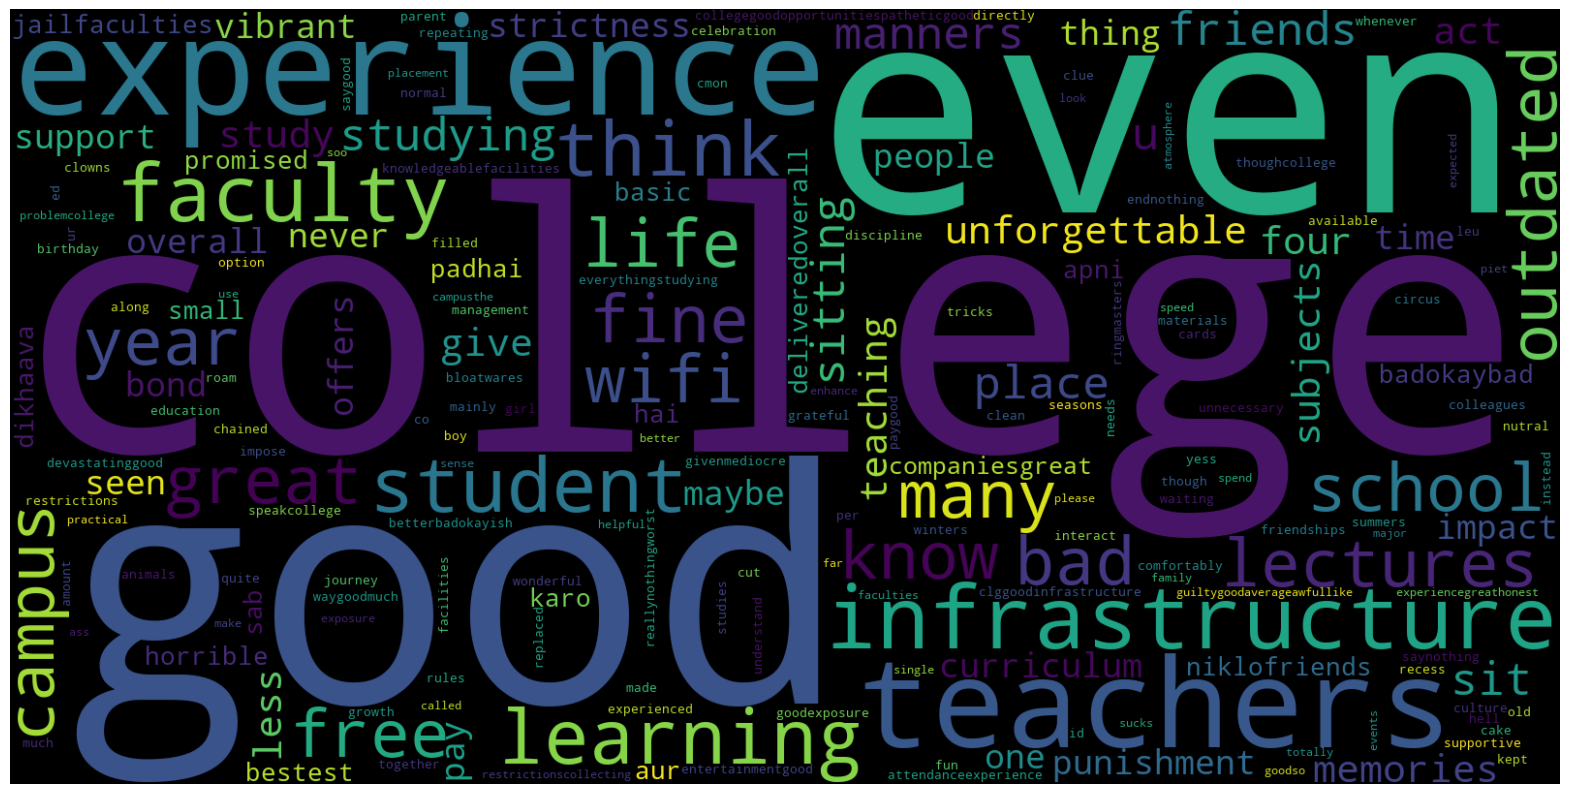

In [38]:
plt.figure(figsize=(20,20))
wc = WordCloud(width=1600, height=800).generate("".join(df['review']))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_31260\3426341562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x='Faculty', data=df,palette="dark:salmon_r")


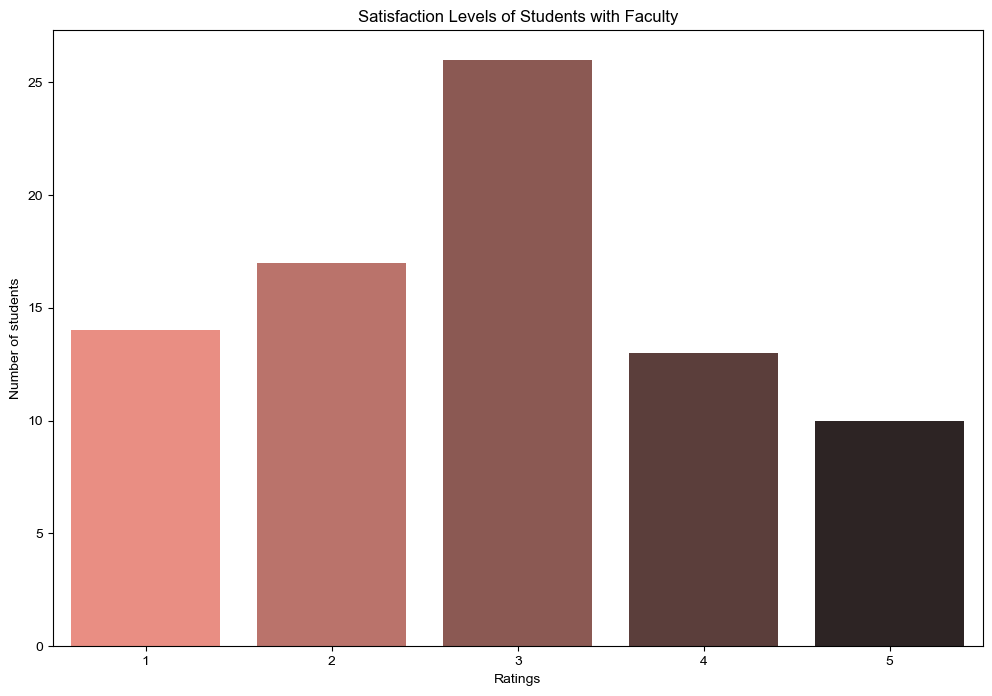

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot( x='Faculty', data=df,palette="dark:salmon_r")
sns.set_style("dark")
plt.title("Satisfaction Levels of Students with Faculty")
plt.xlabel("Ratings")
plt.ylabel("Number of students")
plt.show()

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_31260\2880284324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x='Curriculum', data=df,palette="dark:salmon_r")


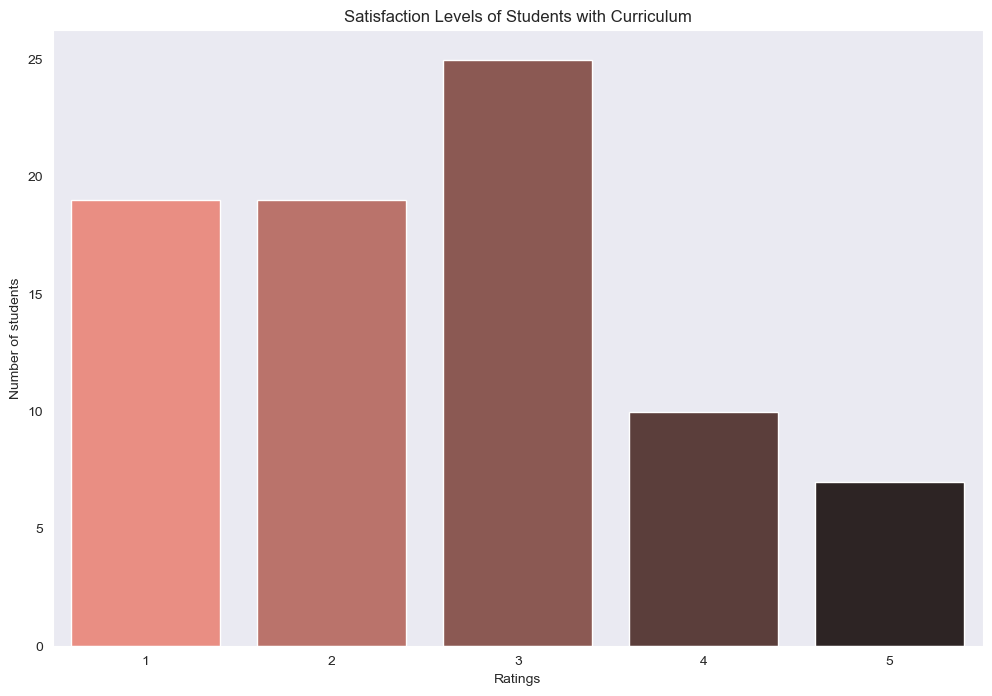

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot( x='Curriculum', data=df,palette="dark:salmon_r")
sns.set_style("dark")
plt.title("Satisfaction Levels of Students with Curriculum")
plt.xlabel("Ratings")
plt.ylabel("Number of students")
plt.show()

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_31260\2370466994.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x='Infrastructure', data=df,palette="dark:salmon_r")


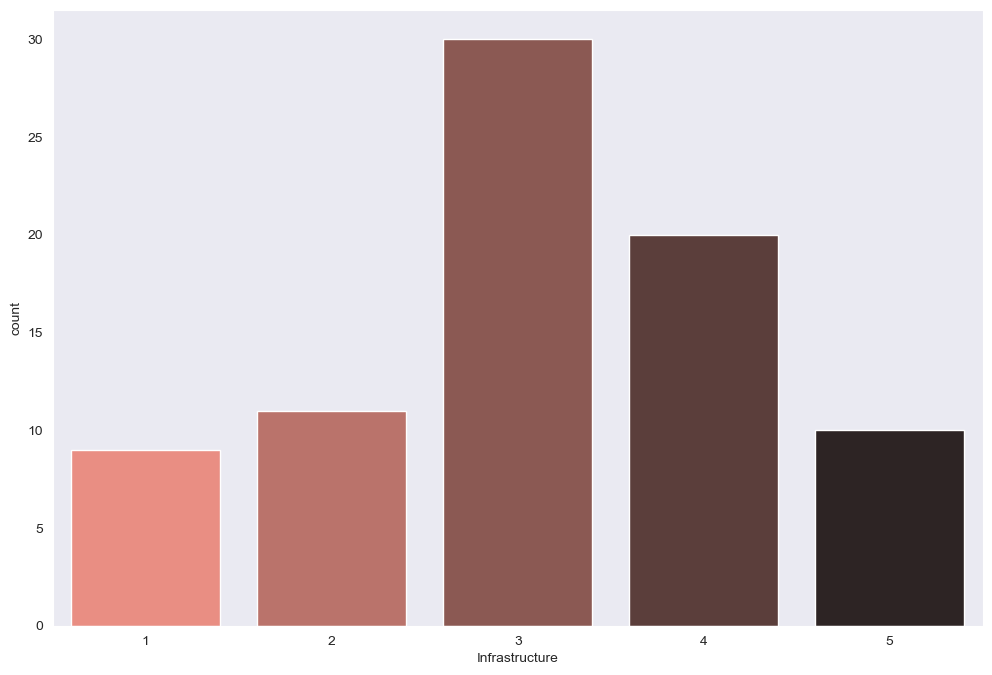

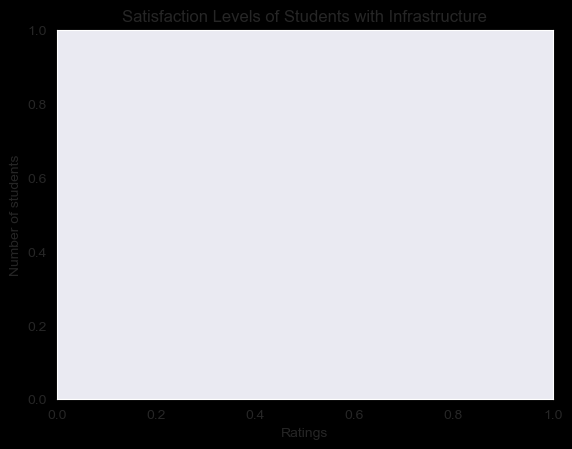

In [41]:
plt.figure(figsize=(12, 8))
sns.countplot( x='Infrastructure', data=df,palette="dark:salmon_r")
sns.set_style("dark")
plt.figure(facecolor='black')
plt.title("Satisfaction Levels of Students with Infrastructure")
plt.xlabel("Ratings")
plt.ylabel("Number of students")
plt.show()

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_31260\3994126440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x='College Crowd & Life', data=df,palette="dark:salmon_r")


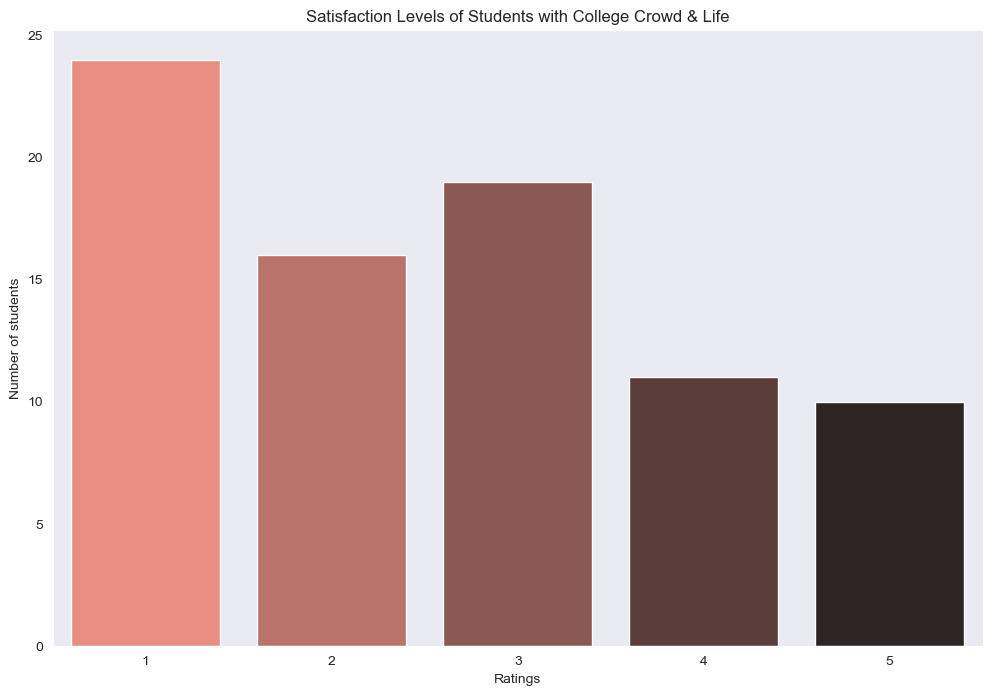

In [42]:
plt.figure(figsize=(12, 8))
sns.countplot( x='College Crowd & Life', data=df,palette="dark:salmon_r")
sns.set_style("dark")
plt.title("Satisfaction Levels of Students with College Crowd & Life")
plt.xlabel("Ratings")
plt.ylabel("Number of students")
plt.show()

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_31260\2977741914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x='Facilities', data=df,palette="dark:salmon_r")


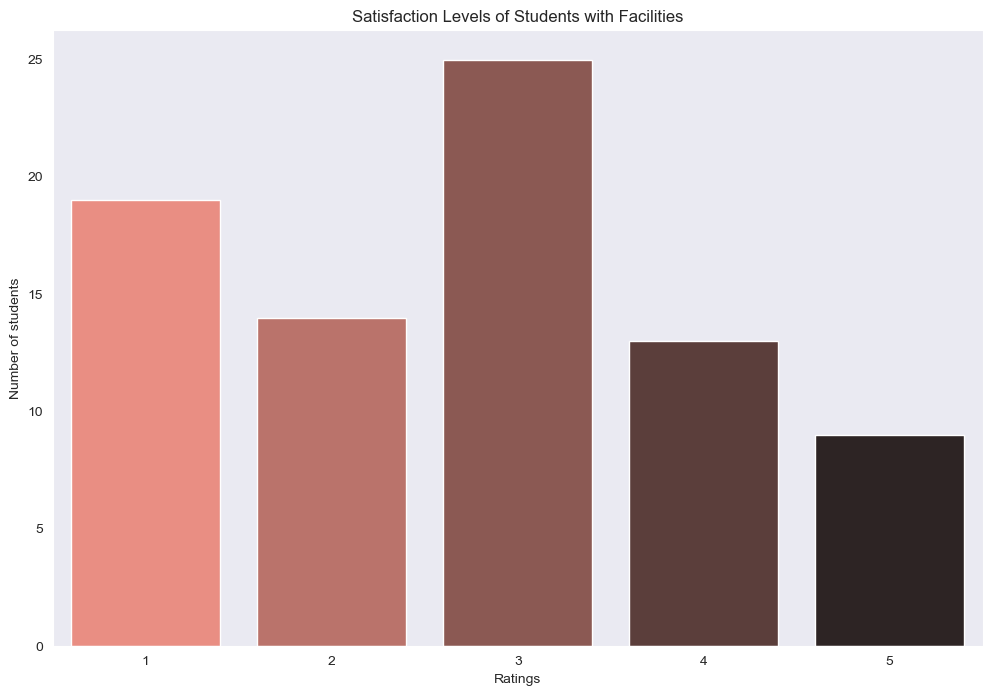

In [43]:
plt.figure(figsize=(12, 8))
sns.countplot( x='Facilities', data=df,palette="dark:salmon_r")
sns.set_style("dark")
plt.title("Satisfaction Levels of Students with Facilities")
plt.xlabel("Ratings")
plt.ylabel("Number of students")
plt.show()

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_31260\397569823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x='good value for money', data=df,palette="dark:salmon_r")


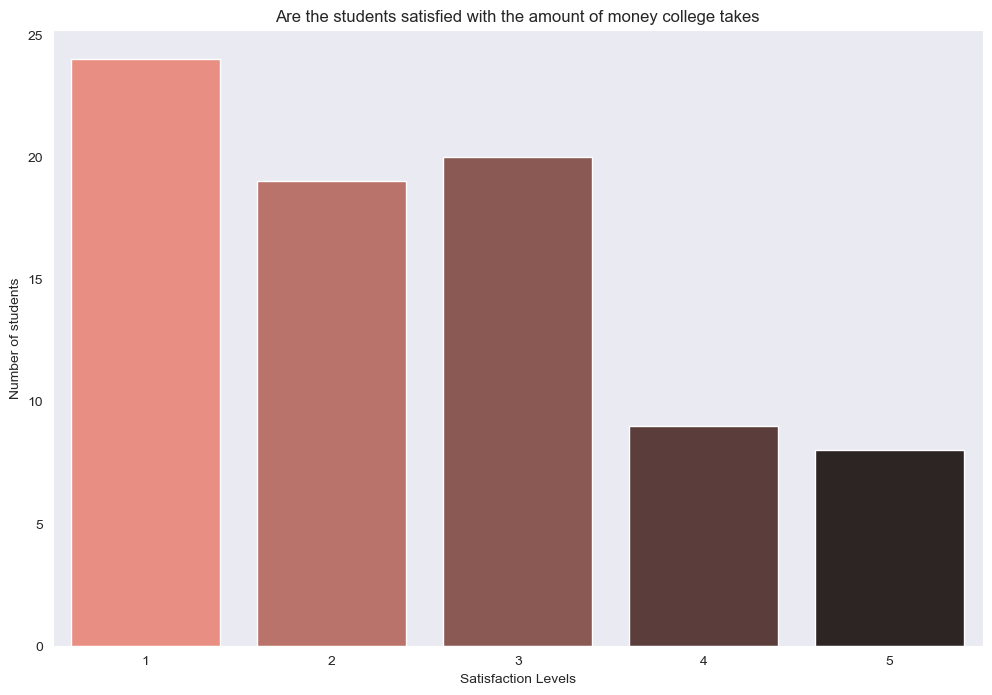

In [44]:
plt.figure(figsize=(12, 8))
sns.countplot( x='good value for money', data=df,palette="dark:salmon_r")
sns.set_style("dark")
plt.title("Are the students satisfied with the amount of money college takes")
plt.xlabel("Satisfaction Levels")
plt.ylabel("Number of students")
plt.show()

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_31260\4250741124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x='refer', data=df,palette="dark:salmon_r")


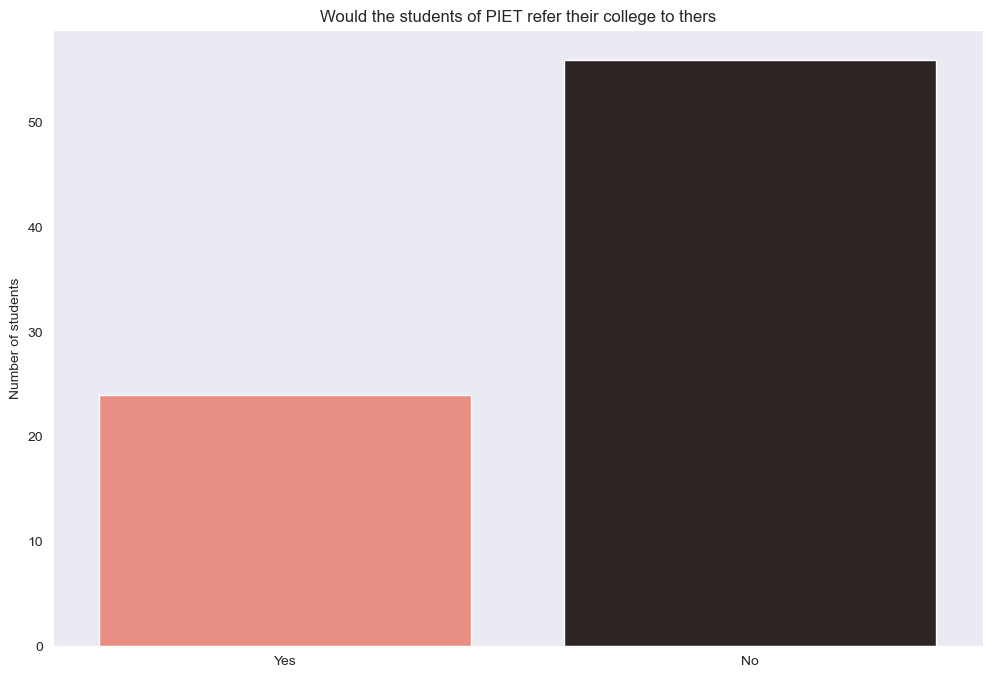

In [45]:
plt.figure(figsize=(12, 8))
sns.countplot( x='refer', data=df,palette="dark:salmon_r")
sns.set_style("dark")
plt.title("Would the students of PIET refer their college to thers")
plt.xlabel("")
plt.ylabel("Number of students")
plt.show()